In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [4]:
cav = pd.read_csv("cavendish.csv", sep = ",", header = None, dtype = float)

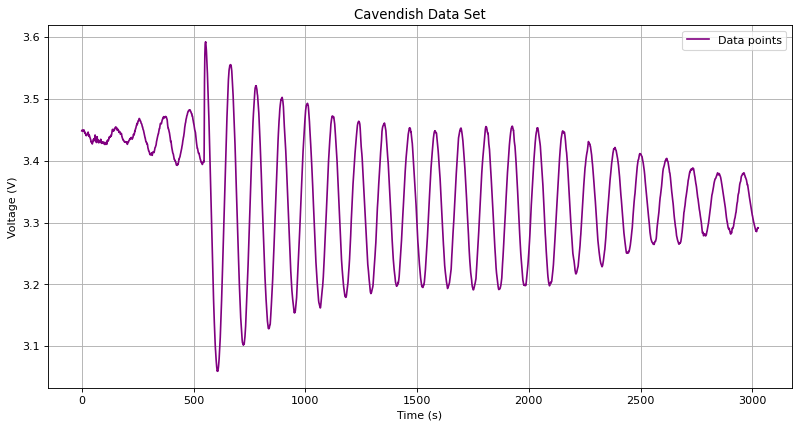

In [72]:
#Plotting and Grouping the Data
plt.figure(figsize=(12,6), dpi=80)
plt.plot(cav[0], cav[1], label = "Data points", color = "purple")
plt.title("Cavendish Data Set")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.savefig("Cavendish Data Set"+".jpeg")
plt.show()

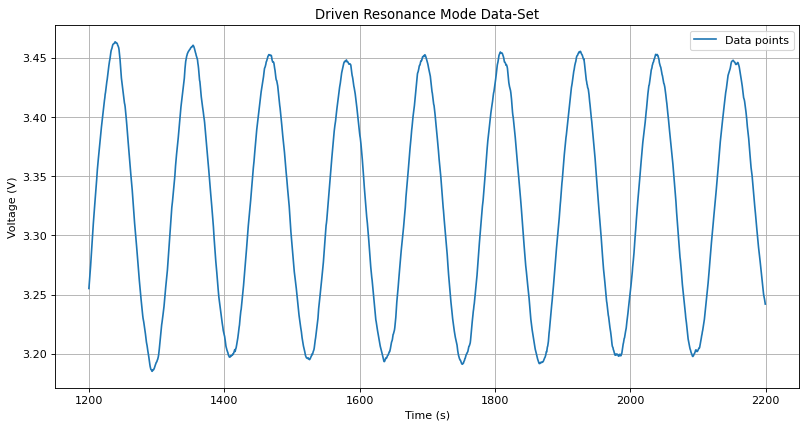

In [24]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(cav[0][2400:4400], cav[1][2400:4400], label = "Data points")
plt.title("Driven Resonance Mode Data-Set")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.savefig("Resonance Mode"+".jpeg")
plt.show()

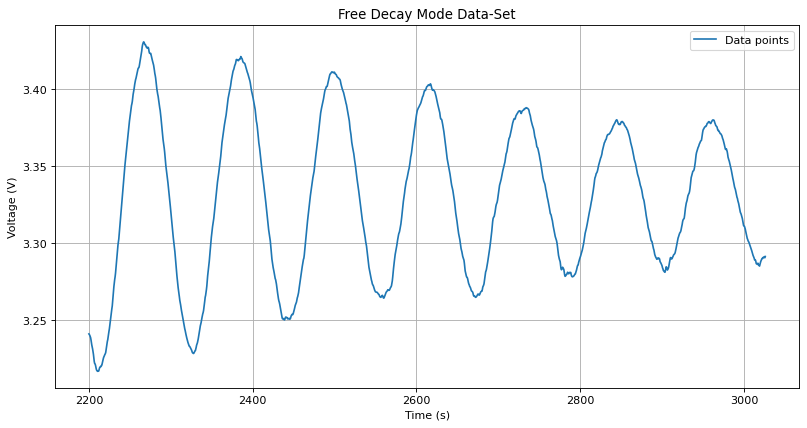

In [26]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(cav[0][4400:], cav[1][4400:], label = "Data points")
plt.title("Free Decay Mode Data-Set")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.savefig("Damping State"+".jpeg")
plt.show()


C:\Users\kubra\AppData\Local\Temp\ipykernel_19204\2238923236.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(cav[0][2400:4400], new_y ,"r", label = "Resonance Mode Fit", color = "blue")


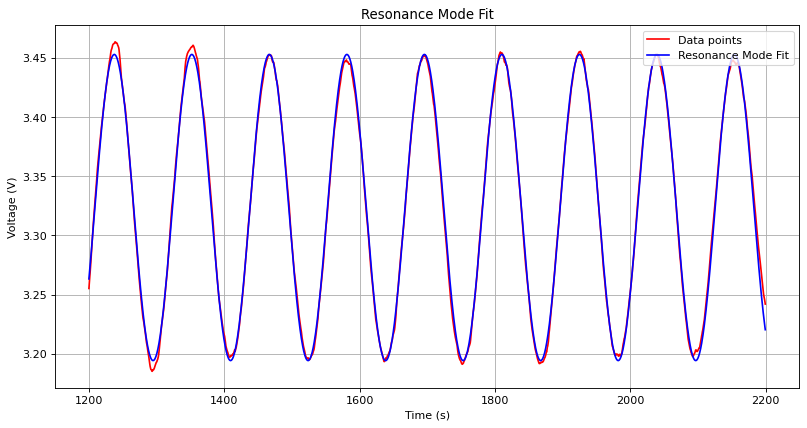

In [87]:
# Fitting for Resonance Mode and Damping Mode
def driven_res(t, A, B, w, p):
    return A + (B * np.sin((w * t) + p))
guess_freq = 0.05
guess_amplitude = 3
guess_phase = 10
guess_offset = 0.12
p0 = [guess_offset, guess_amplitude, guess_freq, guess_phase]
fit = curve_fit(driven_res, cav[0][2400:4400], cav[1][2400:4400], p0 = p0)
new_y = driven_res(cav[0][2400:4400], fit[0][0], fit[0][1], fit[0][2], fit[0][3])
plt.figure(figsize=(12, 6), dpi = 80)
plt.plot(cav[0][2400:4400], cav[1][2400:4400], label = "Data points", color = "red")
plt.plot(cav[0][2400:4400], new_y ,"r", label = "Resonance Mode Fit", color = "blue")
plt.title("Resonance Mode Fit")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend(loc = 1)
plt.savefig("Resonance State Fit"+".jpeg")
plt.show()

In [88]:
params_std = np.sqrt(np.diag(fit[1]))
print("By the resonance state fitting:",
    "\nA =", fit[0][0], " ", params_std[0],
    "\nB =", fit[0][1], " ", params_std[1],
    "\nw =", fit[0][2], " ", params_std[2],
    "\np =", fit[0][3], " ", params_std[3])

By the resonance state fitting: 
A = 3.3236258168515587   9.784281477768884e-05 
B = 0.12951785602142493   0.0001392785692744481 
w = 0.0548444627938492   3.610176326985059e-06 
p = 2.816337939634258   0.006227854602733338


In [92]:
popt, pcov = curve_fit(driven_res, cav[0][2400:4400], cav[1][2400:4400], maxfev = 50000)
pcov

array([[ 4.13686948e-06, -1.65265046e-08,  6.90307732e-10,
        -6.52809085e-06],
       [-1.65265046e-08,  8.27365145e-06, -1.22723373e-07,
         2.08573244e-04],
       [ 6.90307732e-10, -1.22723373e-07,  5.55474353e-04,
        -9.44245478e-01],
       [-6.52809085e-06,  2.08573244e-04, -9.44245478e-01,
         1.65140050e+03]])

In [90]:
popt, pcov = curve_fit(driven_res, cav[0][2400:4400], cav[1][2400:4400], maxfev = 50000)
print("By the resonance state fitting:",
    "\nA =", popt[0], " ", pcov[0],
    "\nB =", popt[1], " ", pcov[1],
    "\nw =", popt[2], " ", pcov[2],
    "\np =", popt[3], " ", pcov[3])

By the resonance state fitting: 
A = 3.327096286197711   [ 4.13686948e-06 -1.65265046e-08  6.90307732e-10 -6.52809085e-06] 
B = -0.00042278799351434175   [-1.65265046e-08  8.27365145e-06 -1.22723373e-07  2.08573244e-04] 
w = 1.0021587774098426   [ 6.90307732e-10 -1.22723373e-07  5.55474353e-04 -9.44245478e-01] 
p = -2.1106303831641267   [-6.52809085e-06  2.08573244e-04 -9.44245478e-01  1.65140050e+03]


In [84]:
def free_decay(t, A, B, d, w, p):
    return A + (B * np.exp(-d * t) * np.sin((w * t) + p))
guess_freq = 0.05
guess_amplitude = 3.3
guess_phase = 15
guess_offset = 1.6
guess_dampedfreq = 0.0012
p1 = [guess_offset, guess_amplitude, guess_dampedfreq, guess_freq, guess_phase]
damped = curve_fit(free_decay, cav[0][4400:], cav[1][4400:], p0 = p1)
damped_y = free_decay(cav[0][4400:], damped[0][0], damped[0][1], damped[0][2], damped[0][3], damped[0][4])

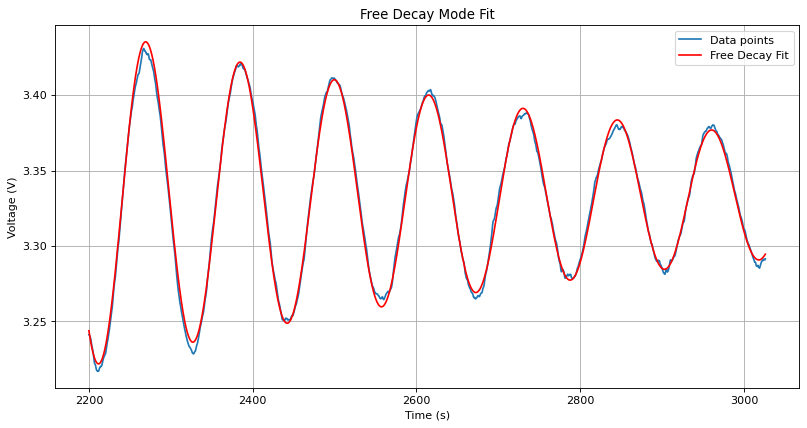

In [85]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(cav[0][4400:], cav[1][4400:], label = "Data points")
plt.plot(cav[0][4400:], damped_y, label = "Free Decay Fit", color = "red")
plt.title("Free Decay Mode Fit")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend(loc = 1)
plt.savefig("Free Decay Mode Fit"+".jpeg")
plt.show()

In [86]:
param_std_damp = np.sqrt(np.diag(damped[1]))
print("By the resonance state fitting:",
    "\nA =", damped[0][0] ,"", param_std_damp[0],
    "\nB =", damped[0][1], "", param_std_damp[1],
    "\nd =", damped[0][2], "", param_std_damp[2],
    "\nw =", damped[0][3], "", param_std_damp[3],
    "\np =", damped[0][4], "", param_std_damp[4])

By the resonance state fitting: 
A = 3.332291440099727  8.383948516006216e-05 
B = 1.6137426254235596  0.028792471166834952 
d = 0.0012122586144096006  7.172029468231398e-06 
w = 0.05454437710358529  7.643240945336568e-06 
p = 3.434904325066677  0.019098804723192843


In [93]:
popt, pcov = curve_fit(free_decay, cav[0][4400:], cav[1][4400:], maxfev = 50000)
print("By the resonance state fitting:",
    "\nA =", popt[0], " ", pcov[0],
    "\nB =", popt[1], " ", pcov[1],
    "\nd =", popt[2], " ", pcov[2],
    "\nw =", popt[3], " ", pcov[3],
    "\np =", popt[4], " ", pcov[4])

By the resonance state fitting: 
A = 3.330339044167148   [inf inf inf inf inf] 
B = 1.0   [inf inf inf inf inf] 
d = 1.0   [inf inf inf inf inf] 
w = 1.0   [inf inf inf inf inf] 
p = 1.0   [inf inf inf inf inf]


C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [69]:
sigma_wd = 5.88*(10**-6)
sigma_d = 5.84*(10**-6)
wd = 0.053
d = 0.001
sigma_w = np.sqrt((wd*sigma_wd/np.sqrt(wd**2 + d**2))**2 + (d*sigma_d/np.sqrt(wd**2 + d**2))**2)
sigma_w
w0 = np.sqrt(wd**2 + d**2)
I = 1.43 * (10**-4)
sigma_I = 6.17 * (10**-3)
k = w0**2 * I
sigma_k = np.sqrt((2*w0*I*sigma_w)**2 + (w0**2 * sigma_I)**2)